# EDA_펭귄데이터

탐색적 자료 분석의 순서

1. 데이터의 모양을 확인 한다.

2. 데이터의 타입을 확인한다.

3. 데이터의 Null 값을 체크한다. 

4. 종속변수의 분포를 살펴본다.

5. 독립변수 - 명목형 변수의 분포를 살펴본다. 

6. 독립변수 - 수치형 변수의 분포를 살펴본다. 

7. 수치형, 명목형 변수간의 관계를 파악한다. 

[출처](https://3months.tistory.com/325)

# 1&2. 데이터 형태와 타입 확인

In [122]:
import pandas as pd 
import numpy as np
import mat# EDA_펭귄데이터plotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [123]:
data = pd.read_csv('train.csv')
data

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [124]:
data = data.drop('id',axis=1)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


# 3. 데이터 전처리

In [126]:
data[data.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [127]:
data = data.drop([6,8,70])  ### 제거하지않고 값을 부여할 수 있는 기준 생각하기

#### [참고] 알고리즘을 통한 예측으로 결측치 처리
[코드공유참고](https://dacon.io/competitions/official/235862/codeshare/4068?page=1&dtype=recent)

In [128]:
data.loc[:,'Delta 15 N (o/oo)'] = data['Delta 15 N (o/oo)'].fillna(data['Delta 15 N (o/oo)'].mean())
data.loc[:,'Delta 13 C (o/oo)'] = data['Delta 13 C (o/oo)'].fillna(data['Delta 13 C (o/oo)'].mean())

In [129]:
data.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Body Mass (g)          0
dtype: int64

## 데이터 분리 (수치형, 문자형)

In [134]:
numeric_feature = data.columns[data.dtypes !='O']
categorical_feature = data.columns[data.dtypes=='O']

In [135]:
numeric_feature

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

# 4. Target 데이터 분포 확인

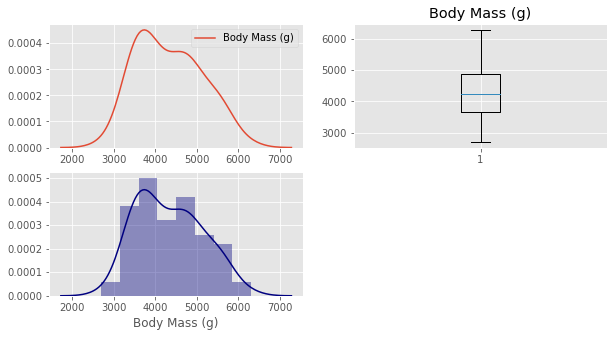

In [136]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1) 
sns.kdeplot(data['Body Mass (g)'])

plt.subplot(2,2,2) 
plt.title('Body Mass (g)')
plt.boxplot(data['Body Mass (g)'])

plt.subplot(2,2,3) 
sns.distplot(data['Body Mass (g)'],color='navy')

## 그룹별 분포 체크

# 5&6. Input 데이터 분포 확인

### 1) 수치형-기술통계량

In [130]:
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,44.717117,17.000000,203.162162,8.738543,-25.718804,4333.333333
std,5.290899,1.925192,14.731253,0.564470,0.851332,787.518639
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.450000,15.250000,190.000000,8.274020,-26.408475,3675.000000
50%,45.200000,17.200000,199.000000,8.634880,-25.898340,4250.000000
75%,49.150000,18.600000,216.000000,9.264635,-25.005945,4875.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [131]:
data.groupby('Species').mean()
# Culmen Length (mm) : Adelie의 평균이 다른 종일 때에 비해 현저히 낮음. (0.25분위수,0.75분위수) = (40,49)
# Culmen Depth (mm) : Gentoo의 평균이 다른 종일 때에 비해 현저히 낮음. (0.25분위수,0.75분위수) = (15.3,18.6)
# Flipper Length (mm) : Gentoo의 평균이 다른 종일 때에 비해 현저히 높음. (0.25분위수,0.75분위수) = (190,216)
# Delta 15 N (o/oo)	Delta 13 C (o/oo) - 대체로 평균에 밀집되어 있는 모습. 종에 따른 큰차이 없어보임.
# Body Mass (g) : Gentoo의 평균이 현저히 높음. (0.25분위수,0.75분위수) = (3675,4875)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.851282,18.323077,189.564103,8.859395,-25.840204,3798.076923
Chinstrap penguin (Pygoscelis antarctica),48.384000,18.396000,196.080000,9.417314,-24.515760,3756.000000
Gentoo penguin (Pygoscelis papua),47.634043,15.159574,218.212766,8.277215,-26.257984,5084.574468


In [132]:
data.groupby('Island').mean()
# Culmen Length (mm) : Torgersen의 평균이 다른 섬일 때에 비해 현저히 낮음. (0.25분위수,0.75분위수) = (40,49)
# Culmen Depth (mm) : Biscoe의 평균이 다른 섬일 때에 비해 현저히 낮음. (0.25분위수,0.75분위수) = (15.3,18.6)
# Flipper Length (mm) : Biscoe의 평균이 다른 섬일 때에 비해 현저히 높음. (0.25분위수,0.75분위수) = (190,216)
# Delta 15 N (o/oo)	Delta 13 C (o/oo) - 대체로 평균에 밀집되어 있는 모습. 섬에 따른 큰차이 없어보임.
# Body Mass (g) : Biscoe의 평균이 현저히 높음. (0.25분위수,0.75분위수) = (3675,4875)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Island,,,,,,
Biscoe,46.183929,15.635714,213.839286,8.385659,-26.202573,4883.035714
Dream,44.297727,18.379545,192.636364,9.225973,-25.014203,3764.772727
Torgersen,38.927273,18.427273,190.909091,8.585327,-26.074380,3809.090909


In [133]:
data.groupby('Sex').mean()
# 대체로 수컷펭귄의 중량이 더 큼.

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Sex,,,,,,
FEMALE,42.996364,16.285455,199.454545,8.662019,-25.634584,4000.909091
MALE,46.407143,17.701786,206.803571,8.813701,-25.801520,4659.821429


### 2) 수치형 - 상자그림을 통한 분포 확인

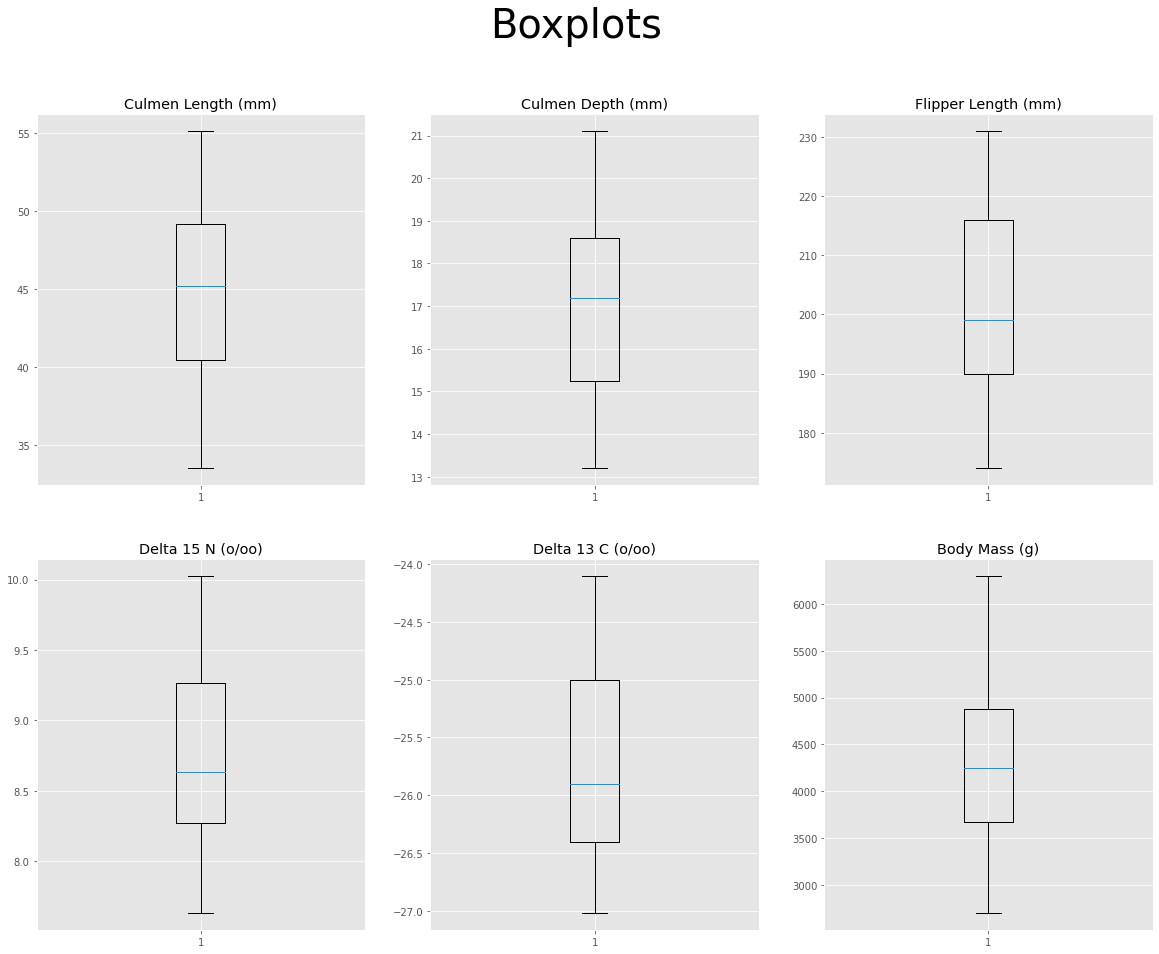

In [137]:
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()


### 3) 수치형 - 커널밀도함수를 통한 분포 확인

[KDE 개념 참고](https://darkpgmr.tistory.com/147)

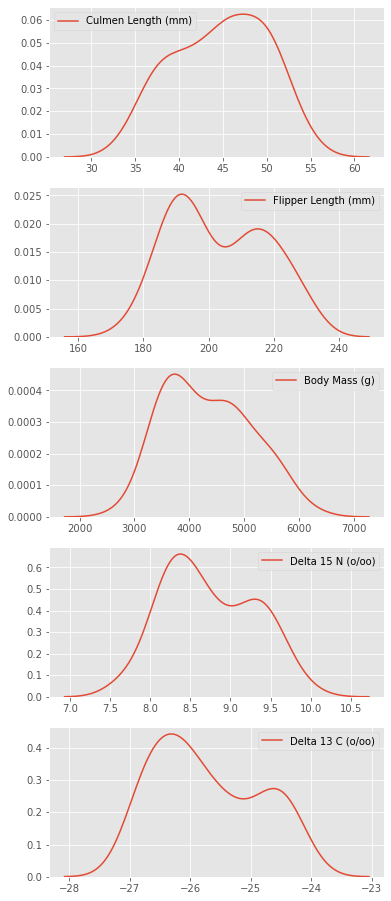

In [138]:
fig, ax = plt.subplots(5,1, figsize = (6,16))
num_columns =['Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
for i in range(len(num_columns)):
  sns.kdeplot(data[num_columns[i]], ax = ax[i]) #kde : kernel density estimation

## 대체로 양봉형 - 그룹별 분포 체크

### 1) 명목형 - 빈도수 확인

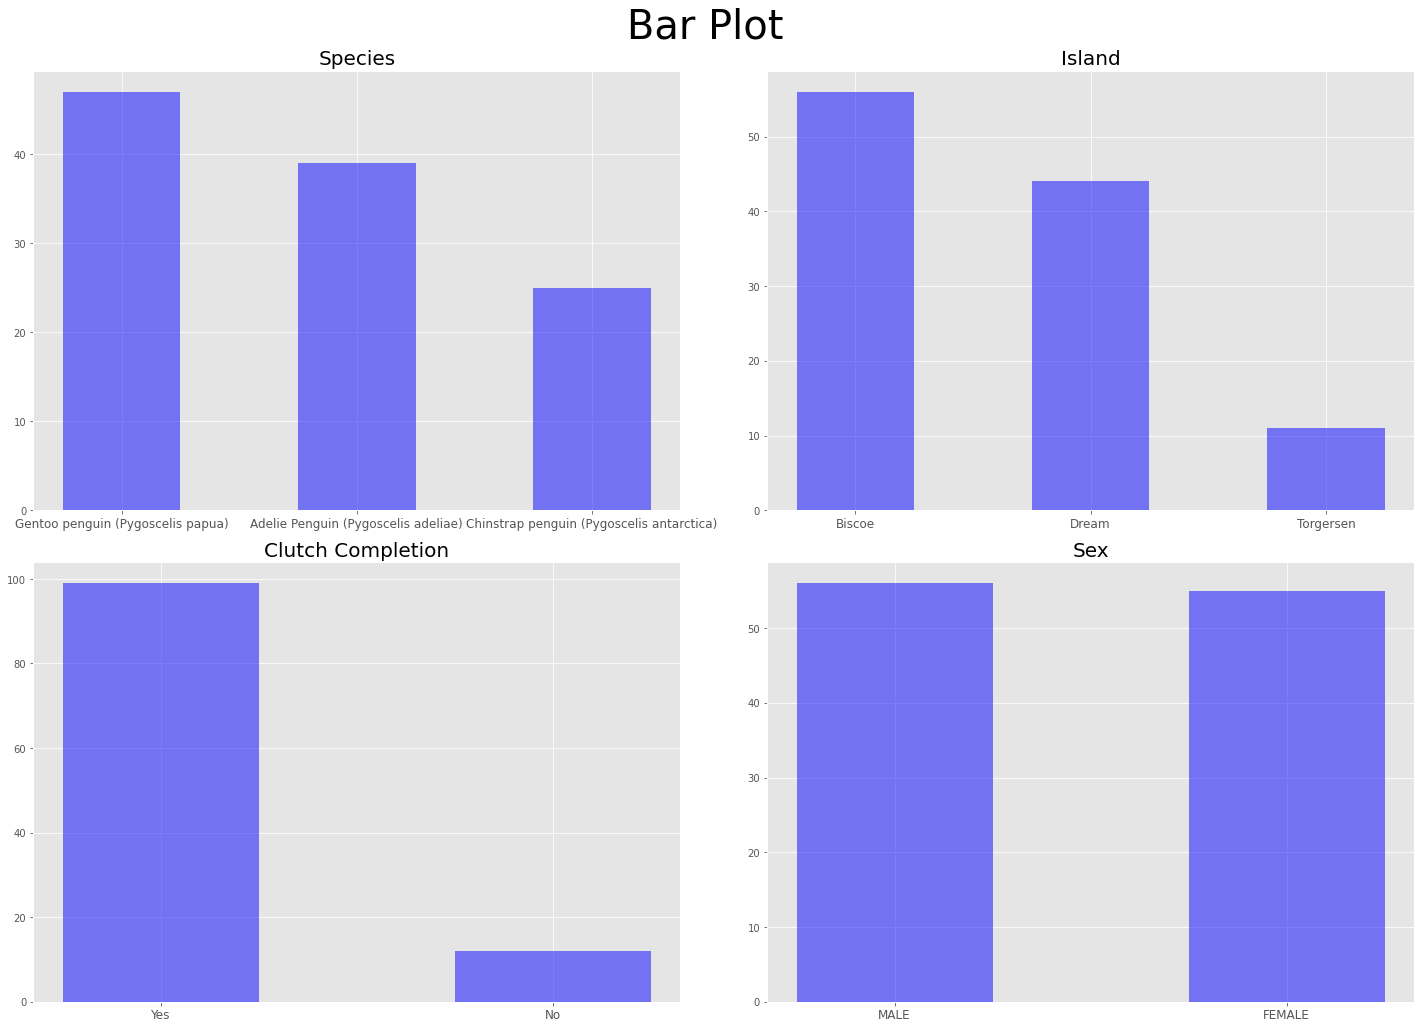

In [139]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1) # 행,열,index
    plt.title(feature[i], fontsize=20)
    temp = data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Species : Gentoo penguin이 가장 많음  
Island : Biscore가 가장 많음  
Clutch Completetion : data imbalance가 심함  
Sex : 두 카테고리 모두 동일한 비율을 보임

### 2) 명목형 - Pie chart를 통한 비율 확인

([<matplotlib.patches.Wedge at 0x1fe08970e20>,
 [Text(-0.015565921257439953, 1.09988985907472, 'MALE'),
  Text(0.01556592125743982, -1.09988985907472, 'FEMALE')],
 [Text(-0.008490502504058155, 0.5999399231316653, '50.5%'),
  Text(0.008490502504058082, -0.5999399231316653, '49.5%')])

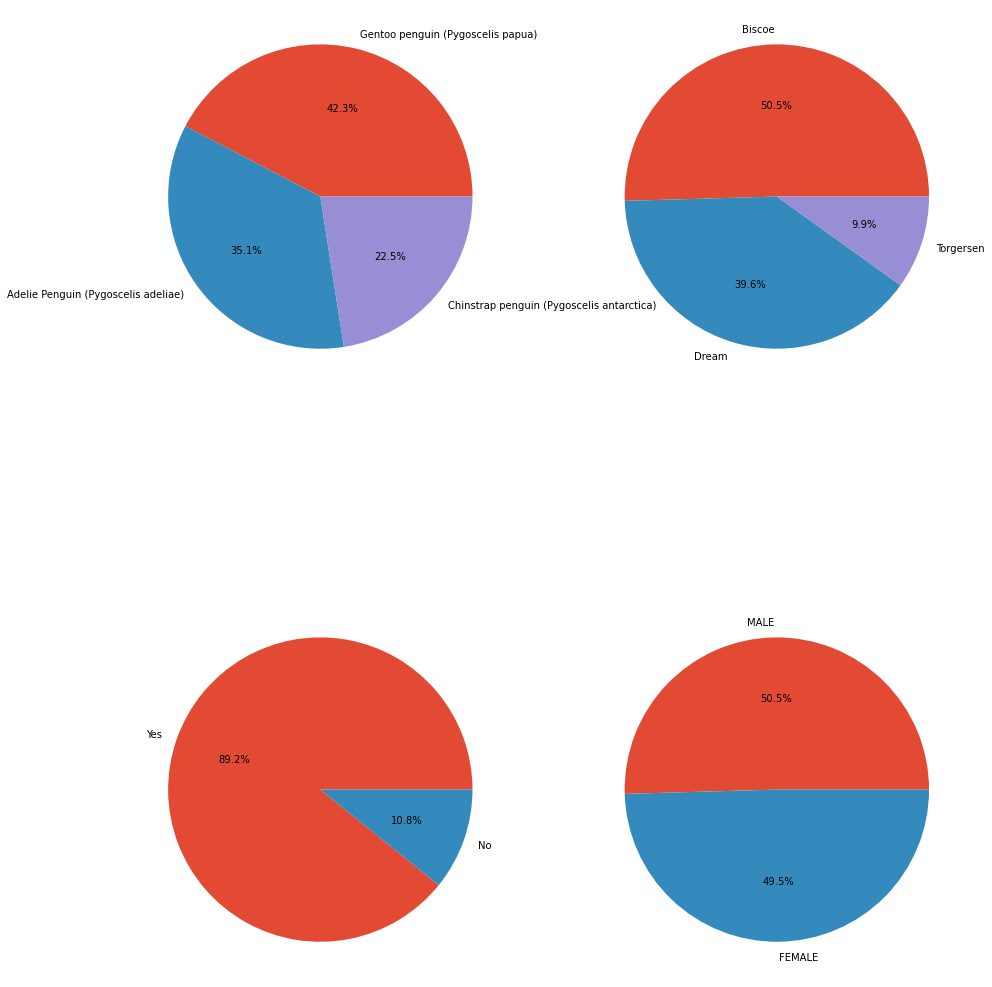

In [140]:
# Pie chart를 통한 비율 확인

feature = categorical_feature
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
### 1) 명목형 - 빈도수 확인plt.pie(data['Species'].value_counts(),
            labels=[data['Species'].value_counts().index[0],data['Species'].value_counts().index[1],data['Species'].value_counts().index[2]],
            autopct="%.1f%%")
    
plt.subplot(2,2,2)
plt.pie(data['Island'].value_counts(),
        labels=[data['Island'].value_counts().index[0],data['Island'].value_counts().index[1],data['Island'].value_counts().index[2]],
        autopct="%.1f%%")

plt.subplot(2,2,3)
plt.pie(data['Clutch Completion'].value_counts(),
        labels=[data['Clutch Completion'].value_counts().index[0],data['Clutch Completion'].value_counts().index[1]],
        autopct="%.1f%%")

plt.subplot(2,2,4)
plt.pie(data['Sex'].value_counts(),
        labels=[data['Sex'].value_counts().index[0],data['Sex'].value_counts().index[1]],
        autopct="%.1f%%")

### 상관관계 시각화

+ 카테고리형 데이터를 수치형으로 변환하기 ▶ label encoder

[참고링크](https://teddylee777.github.io/scikit-learn/labelencoder-%EC%82%AC%EC%9A%A9%EB%B2%95)

In [141]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(la.fit_transform)

In [152]:
corr_df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,2,0,1,50.0,15.3,220,1,8.305150,-25.190170,5550
1,1,1,0,49.5,19.0,200,1,9.630740,-24.346840,3800
2,2,0,1,45.1,14.4,210,0,8.519510,-27.018540,4400
3,2,0,1,44.5,14.7,214,0,8.201060,-26.165240,4850
4,2,0,0,49.6,16.0,225,1,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,0,2,1,36.6,17.8,185,0,8.738543,-25.718804,3700
110,0,1,1,39.2,18.6,190,1,9.110060,-25.795490,4250
111,0,1,1,43.2,18.5,192,1,8.970250,-26.036790,4100
112,1,1,0,46.9,16.6,192,0,9.805890,-24.737350,2700


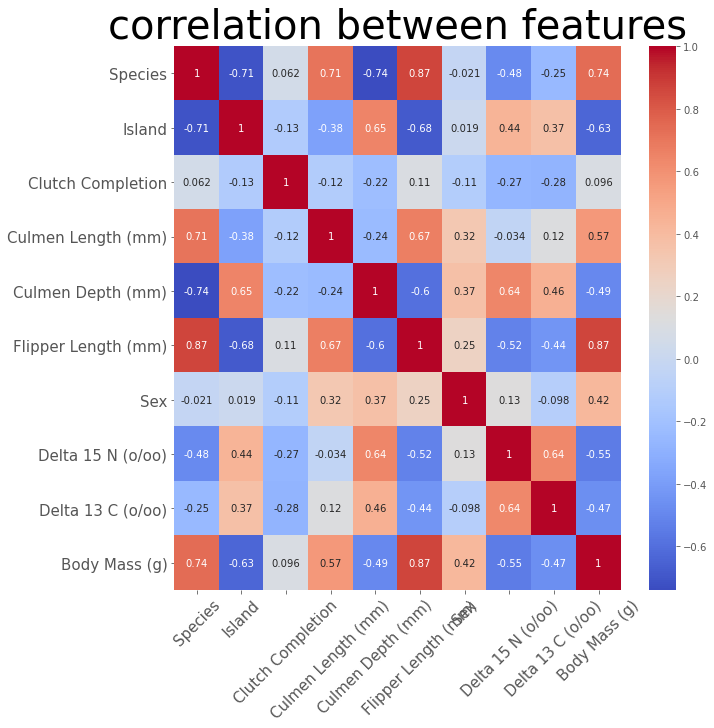

In [143]:
plt.figure(figsize=(10,10))

heat_table = corr_df.corr()
# mask = np.zeros_like(heat_table)         ## like
# mask[np.triu_indices_from(mask)] = True  ## np.triu
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm') # annot : 숫자 표시 , mask=mask일 때 윗삼각행렬자리 상관계수제거
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show() 

Flipper Length (mm)와 가장 높은 상관(0.87)을 보임.  
그 이외에도 Species, Island, Culmen Length (mm), Delta 15 N (o/oo) 와도 높은 상관을 갖는 것으로 보여짐.

# 7. 수치형 명목형간의 관계 파악

## 1) 산점도 파악
* 수치특성 vs 타겟
* 그룹별 수치특성 vs 타겟

## 수치 특성데이터 vs 타겟데이터 산점도
 몇몇 특성에서 분포가 분리되어 보임. -> 그룹별 산점도 확인

In [144]:
target = "Body Mass (g)"

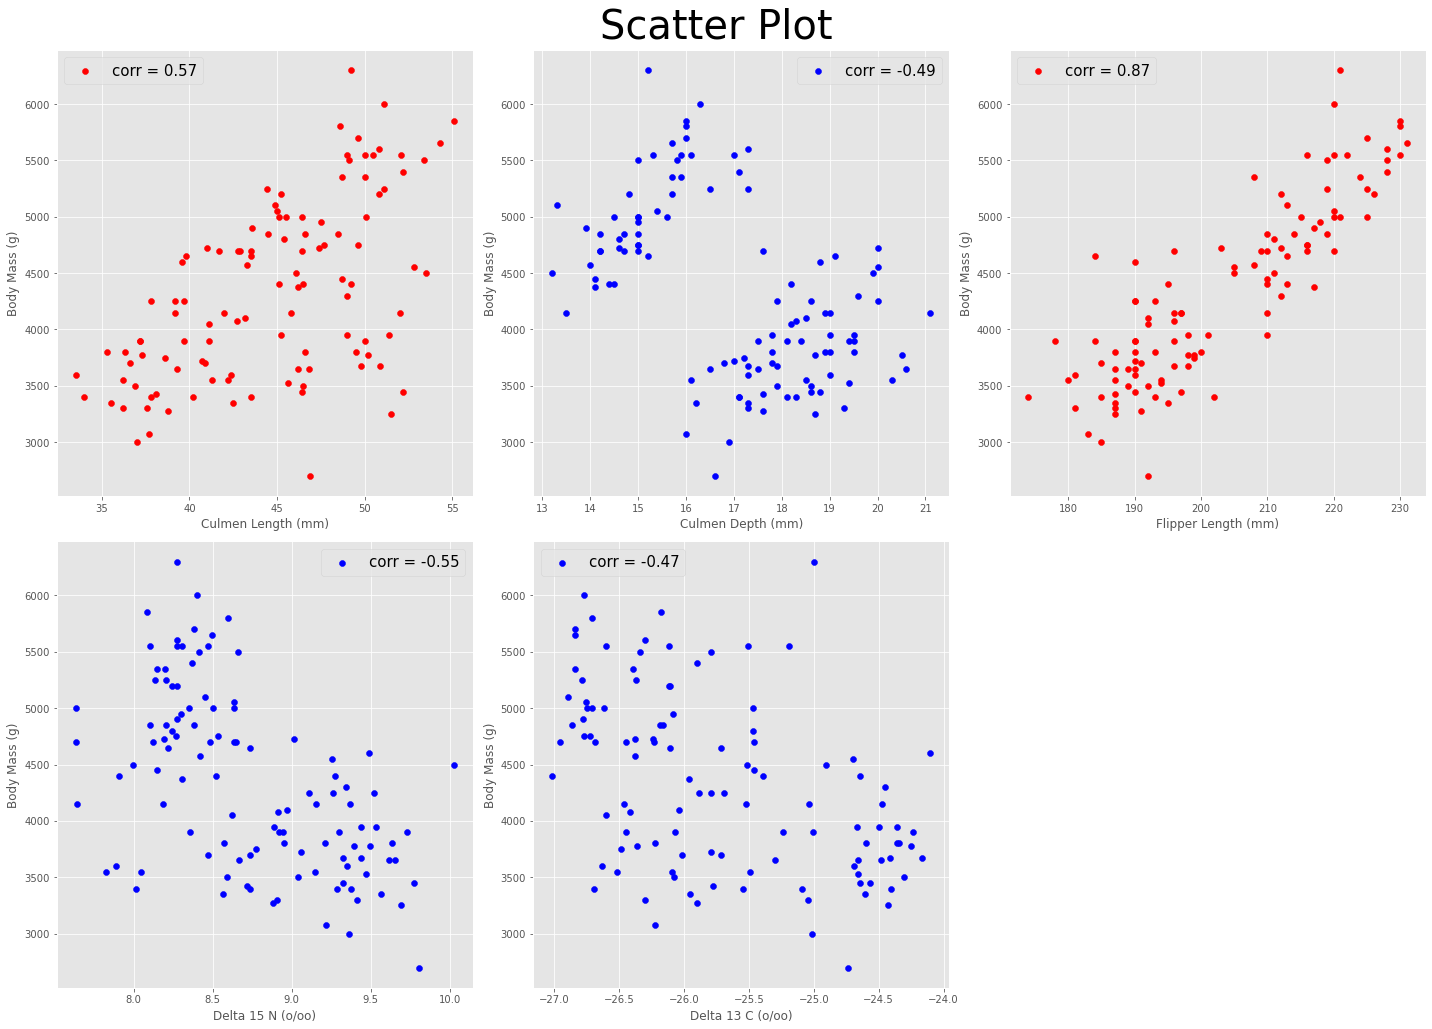

In [145]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(2,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## <그룹별> 수치 특성데이터 vs 타겟데이터

### Culmen Length (mm)

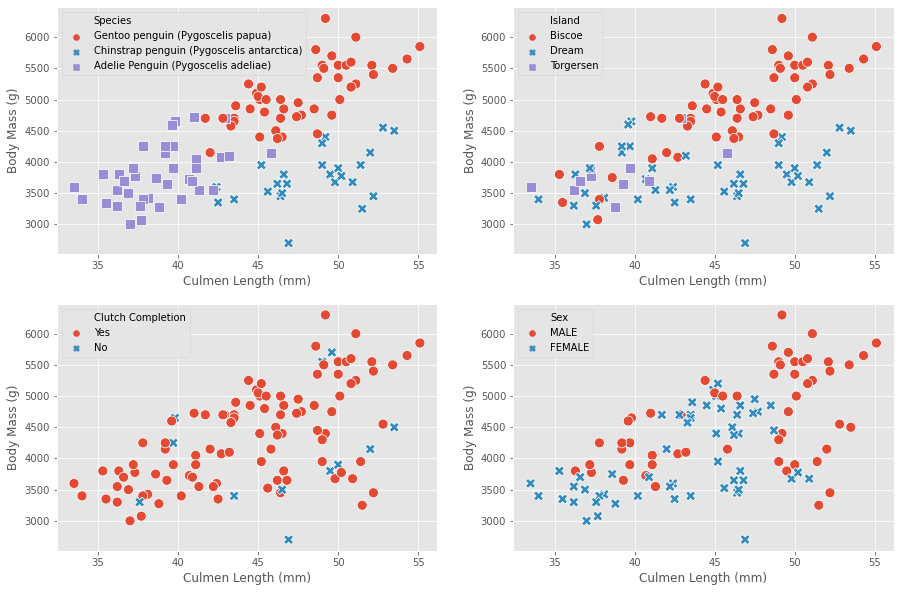

In [146]:
feature = categorical_feature

# Scatter plot by Groups
plt.figure(figsize=(15,10))

for i in range(len(feature)):
        plt.subplot(2,2,i+1)
        sns.scatterplot(x = data['Culmen Length (mm)'], 
                y = data['Body Mass (g)'], 
                hue = data[feature[i]], # different colors by group
                style = data[feature[i]], # different shapes by group
                s = 100, # marker size
                data = data)
#plt.show()

### Culmen Length (mm)의 경우 종과 지역에 따라 분포에 영향을 받음  
   >  * Species의 경우 Adelie종이 대체로 작은 Culmen Length (mm)를 가짐.  
        gentoo종의 경우 더 큰 중량값을 가지는 것으로 보여짐. 
      
      
   >  * Island의 경우 Torgersen 섬이 대체로 작은 Culmen Length (mm)를 가짐. 
      (단 데이터 불균형 때문에 그렇게 큰 의미는 x)    
      Biscoe 섬의 경우일 때 더 큰 중량값을 가지는 것으로 보여짐.
      
      
   >  * Clutch Completion의 경우 데이터 불균형이 심해 큰 의미를 가질 수 없을 것이라 판단됨.  
      
      
   >  *  Sex에 따른 Culmen Length (mm) 분포의 차이는 크게 보이지 않지만  
    암컷펭귄의 경우 중량이 같은 Culmen Length 대비 더 작은 것으로 보여짐.
   
>  카테고리별 비교시에도 대체로 각각의 그룹 모두 양의 상관관계를 갖는 것으로 보여짐.  

### Culmen Depth (mm)

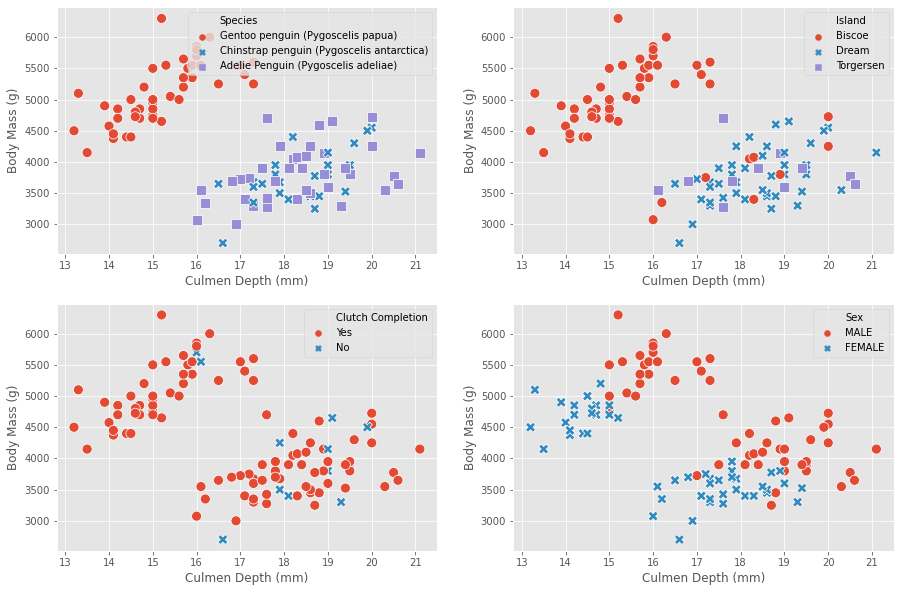

In [147]:
feature = categorical_feature

# Scatter plot by Groups
plt.figure(figsize=(15,10))

for i in range(len(feature)):
        plt.subplot(2,2,i+1)
        sns.scatterplot(x = data['Culmen Depth (mm)'], 
                y = data['Body Mass (g)'], 
                hue = data[feature[i]], # different colors by group
                style = data[feature[i]], # different shapes by group
                s = 100, # marker size
                data = data)
#plt.show()

### Culmen Depth (mm)의 경우 종과 지역에 따라 분포에 영향을 받음  
   >  * Species의 경우 gentoo 종이 대체로 작은 Culmen Depth (mm)를 가짐.  
      gentoo종의 경우 더 큰 중량값을 가지는 것으로 보여짐. 
      
      
   >  * Island의 경우 Biscoe 섬이 대체로 작은 Culmen Depth (mm)를 가짐.  
      Biscoe 섬의 경우 더 큰 중량값을 가지는 것으로 보여짐.
      
      
   >  * Clutch Completion의 경우 데이터 불균형이 심해 큰 의미를 가질 수 없을 것이라 판단됨.  
      
      
   >  *  Sex에 따른 Culmen Depth (mm) 분포의 차이는 크게 보이지 않지만  
   암컷펭귄의 경우 중량이 같은 culmen depth 대비 더 작은 것으로 보여짐.
   
>  Culmen Depth (mm)의 경우 타겟데이터와 상관계수는 -0.49로 <br> 음의 상관관계를 갖는 것으로 보였으나  그룹별 확인 결과 <br>  종, 섬의 종류에 따라 분리해서 보았을 때  양의 상관관계를 갖는 것으로도 볼 수 있어보임.  

### Flipper Length (mm)

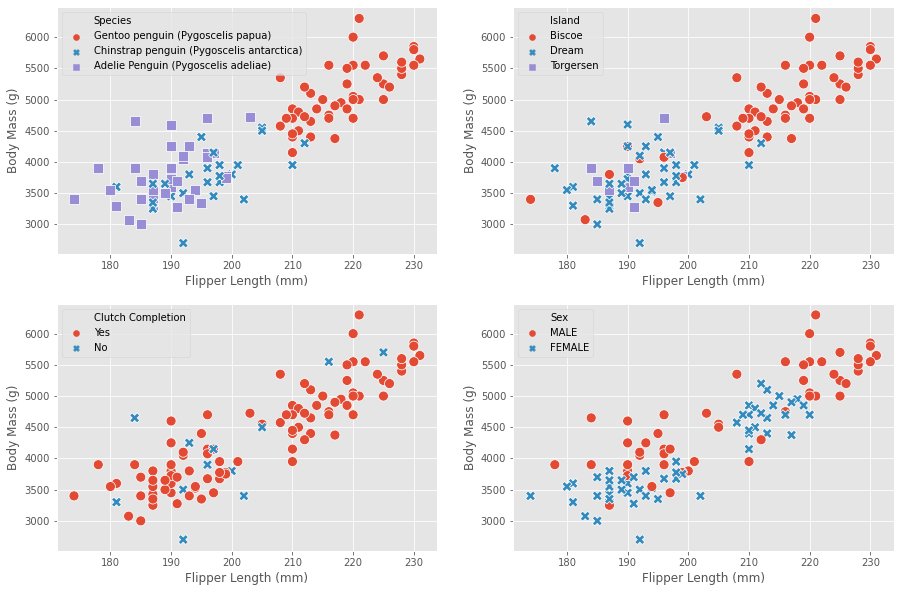

In [148]:
feature = categorical_feature

# Scatter plot by Groups
plt.figure(figsize=(15,10))

for i in range(len(feature)):
        plt.subplot(2,2,i+1)
        sns.scatterplot(x = data['Flipper Length (mm)'], 
                y = data['Body Mass (g)'], 
                hue = data[feature[i]], # different colors by group
                style = data[feature[i]], # different shapes by group
                s = 100, # marker size
                data = data)
#plt.show()

### Flipper Length (mm)의 경우 종과 지역에 따라 분포에 영향을 받음  
   >  * Species의 경우 Gentoo종이 대체로 큰 Flipper Length (mm)를 가짐.  
        gentoo종의 경우 더 큰 중량값을 가지는 것으로 보여짐. 
      
      
   >  * Island의 경우 Biscoe 섬이 대체로 큰 Flipper Length (mm)를 가짐. 
      Biscoe 섬의 경우일 때 더 큰 중량값을 가지는 것으로 보여짐.
      
      
   >  * Clutch Completion의 경우 데이터 불균형이 심해 큰 의미를 가질 수 없을 것이라 판단됨.  
      
      
   >  *  Sex에 따른 Flipper Length (mm) 분포의 차이는 크게 보이지 않지만  
    암컷펭귄의 경우 중량이 같은 Flipper Length 대비 더 작은 것으로 보여짐.
   
>  카테고리별 비교시에도 대체로 각각의 그룹 모두 양의 상관관계를 갖는 것으로 보여짐.  

### Delta 15 N (o/oo)

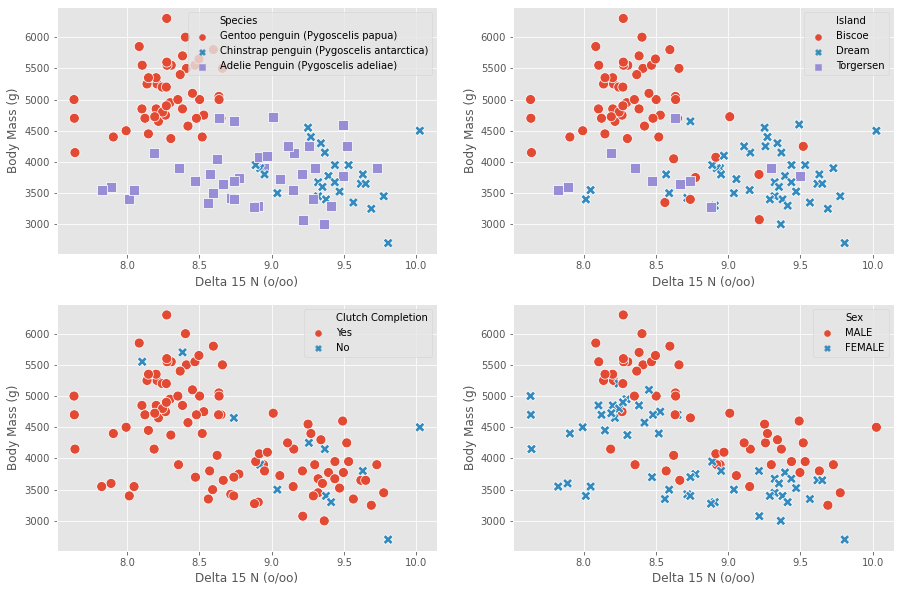

In [149]:
feature = categorical_feature

# Scatter plot by Groups
plt.figure(figsize=(15,10))

for i in range(len(feature)):
        plt.subplot(2,2,i+1)
        sns.scatterplot(x = data['Delta 15 N (o/oo)'], 
                y = data['Body Mass (g)'], 
                hue = data[feature[i]], # different colors by group
                style = data[feature[i]], # different shapes by group
                s = 100, # marker size
                data = data)
#plt.show()

### Delta 13 C (o/oo)

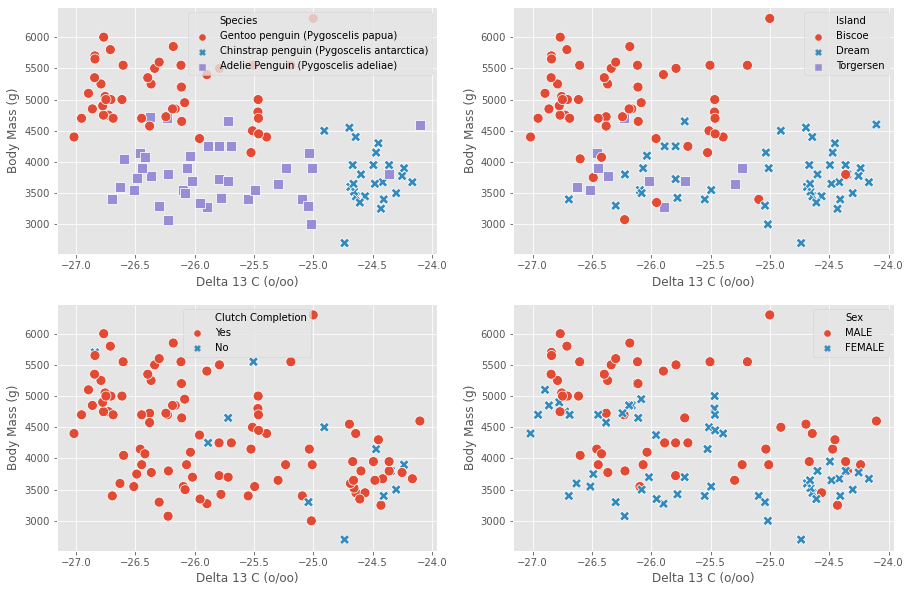

In [150]:
feature = categorical_feature

# Scatter plot by Groups
plt.figure(figsize=(15,10))
## Delta 15 N (o/oo)
for i in range(len(feature)):
        plt.subplot(2,2,i+1)
        sns.scatterplot(x = data['Delta 13 C (o/oo)'], 
                y = data['Body Mass (g)'], 
                hue = data[feature[i]], # different colors by group
                style = data[feature[i]], # different shapes by group
                s = 100, # marker size
                data = data)
#plt.show()

Delta 15 N (o/oo)와 Delta 13 C (o/oo)은 그룹별 산점도를 확인했을 때  
산점도를 확인 했을때 각 카테고리별로 거의 유사한 분포를 갖는 것으로 보여짐.

## 2) target과 카테고리형 feature의 관계

*  Violin Plot
* 박스 플롯에 커널 밀도 함수 그래프를 y 축 방향에 추가한 그래프  
[참고 링크](https://steadiness-193.tistory.com/195)

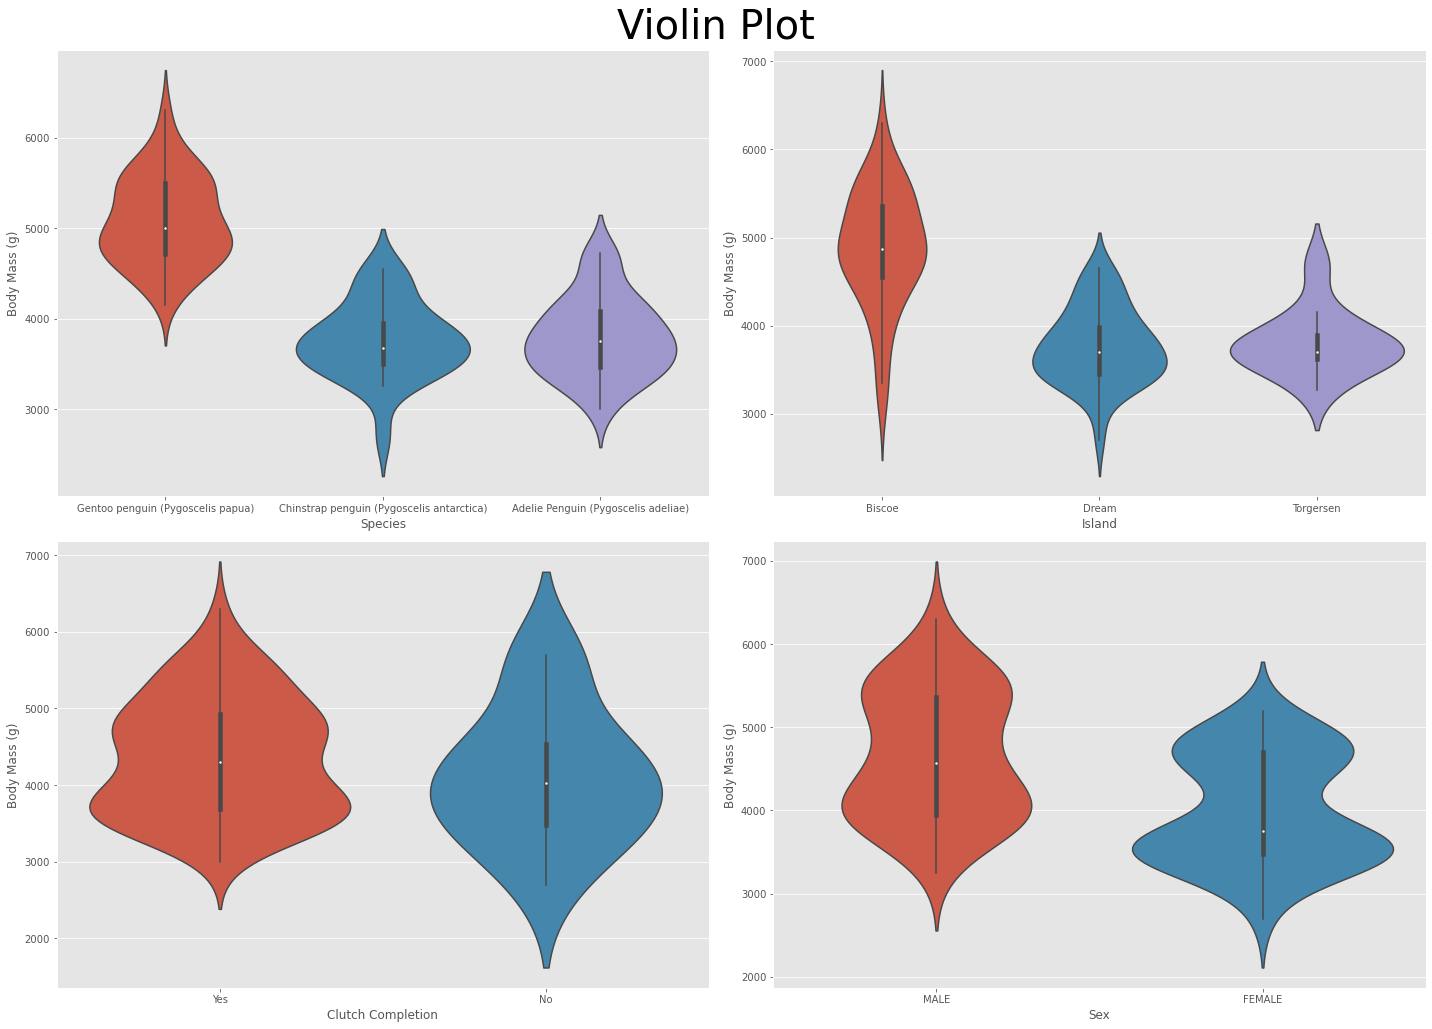

In [151]:
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()